In [1]:
import numpy as np
from keras.models import Sequential 
from keras.optimizers import Adam
from keras.layers import Flatten, Dense, Dropout
import pandas as pd
import matplotlib.pyplot as plt
import cv2, random, os, ntpath
from sklearn.utils import shuffle
from keras.layers import Convolution2D #check
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from imgaug import augmenters as iaa

Using TensorFlow backend.


In [2]:
!git clone https://github.com/rslim087a/track
#!git clone https://github.com/minlaxz/simulator_track
#!pip3 install imgaug

Cloning into 'track'...
remote: Enumerating objects: 12163, done.
remote: Total 12163 (delta 0), reused 0 (delta 0), pack-reused 12163
Receiving objects: 100% (12163/12163), 156.98 MiB | 49.86 MiB/s, done.
Checking out files: 100% (12160/12160), done.


In [3]:
datadir = 'track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir,'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


In [4]:
def path_leaf(path):
  head, tail= ntpath.split(path)
  return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head(3)

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910


In [5]:
type(data['center'].head(3))

pandas.core.series.Series

In [6]:
data['center'].head(3)

0    center_2018_07_16_17_11_43_382.jpg
1    center_2018_07_16_17_11_43_670.jpg
2    center_2018_07_16_17_11_43_724.jpg
Name: center, dtype: object

26
25


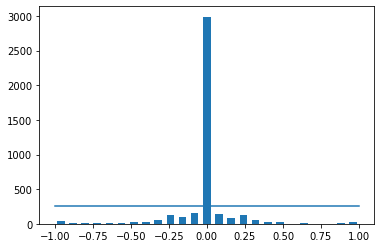

In [7]:
num_bins = 25

samples_per_bin = 250 

hist, bins= np.histogram(data['steering'], num_bins)  #6386 steering points will split into 25 cate
print(len(bins))                                      #bins return from histogram is 26 length but no zero value

center = (bins[:-1] + bins[1:]) * 0.5
print(len(center))                                    #rearraged including zero

plt.bar(center, hist, width=0.05)
#plt.plot((np.min(data['steering']), np.max(data['steering'])), (200,200))
plt.plot((-1,1),(samples_per_bin,samples_per_bin))

In [8]:
print('rearraged')
print(bins)
print(len(bins))
print(center)
print(len(center))
print(hist)
print(len(hist))

rearraged
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]
26
[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96]
25
[  35    6    6    6   13    8   24   22   53  131   99  158 2990  137
   86  126   54   22   19    2    9    4    4    6   33]
25


In [9]:
#by math, middle of 25 is 13 but in list array len25 is 0 to 24 and so middle is 12
print(hist[12])
print(center[12])

2990
0.0


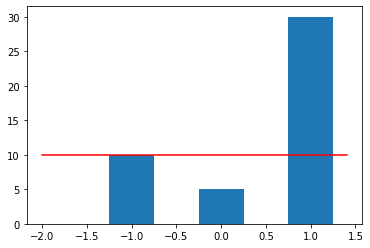

In [10]:
plt.bar([-1,0,1],[10,5,30],0.5)
plt.plot((-2,1.4),(10,10),color='red')

In [11]:
print(bins)
print('total data', len(data))  #6386
remove_list = []
for j in range(num_bins):       #0 -> 25
  list_ = []
  for i in range(len(data['steering'])):   #0 -> 6386
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)          #shuffle for data stablity
  list_ = list_[samples_per_bin:] #250 to the end **CROP
  remove_list.extend(list_)       #like append but whole list adding

print('removed' , len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining' , len(data))

hist, _ = np.histogram(data['steering'], (num_bins))


[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]
total data 4053
removed 2740
remaining 1313


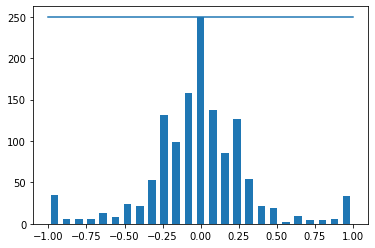

In [12]:
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin,samples_per_bin))

In [13]:
type(data.iloc[0])

pandas.core.series.Series

In [14]:
data.iloc[0]

center      center_2018_07_16_17_11_43_860.jpg
left        left_2018_07_16_17_11_43_860.jpg  
right       right_2018_07_16_17_11_43_860.jpg 
steering    0                                 
throttle    0                                 
reverse     0                                 
speed       0.615438                          
Name: 4, dtype: object

In [15]:
data.iloc[0][0]

'center_2018_07_16_17_11_43_860.jpg'

In [16]:
data.iloc[0][0].strip()

'center_2018_07_16_17_11_43_860.jpg'

In [17]:
os.path.join(datadir+'/IMG/'+data.iloc[0][0].strip())

'track/IMG/center_2018_07_16_17_11_43_860.jpg'

In [ ]:
def load_img_steering(datadir, df):
  image_path=[]
  steering = []
  for i in range(len(data)):  #0 -> 1874 dropped data
    indexed_data = data.iloc[i]
    center , left , right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir+center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

image_paths , steerings = load_img_steering(datadir+'/IMG/' , data)

In [19]:
print(len(image_paths))
print(len(steerings))
print(type(image_paths))
print(image_paths[0])

1313
1313
<class 'numpy.ndarray'>
track/IMG/center_2018_07_16_17_11_43_860.jpg


In [20]:
X_train, X_valid , y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training samples', len(X_train))
print('Validation samples', len(X_valid))

Training samples 1050
Validation samples 263


In [21]:
print(len(X_train))
print(len(y_train))
print(X_train.shape)
print(y_train.shape)
print(type(X_train))
print(type(y_train))

1050
1050
(1050,)
(1050,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Validation Set')

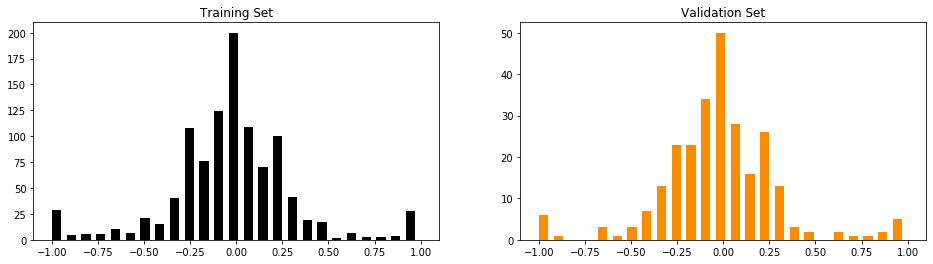

In [22]:
fig , axes = plt.subplots(1, 2, figsize=(16,4))

axes[0].hist(y_train, bins=num_bins, width=0.05, color='black')
axes[0].set_title('Training Set')

axes[1].hist(y_valid, bins=num_bins, width=0.05, color='darkorange')
axes[1].set_title('Validation Set')

In [ ]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image

Text(0.5, 1, 'Zoomed Image')

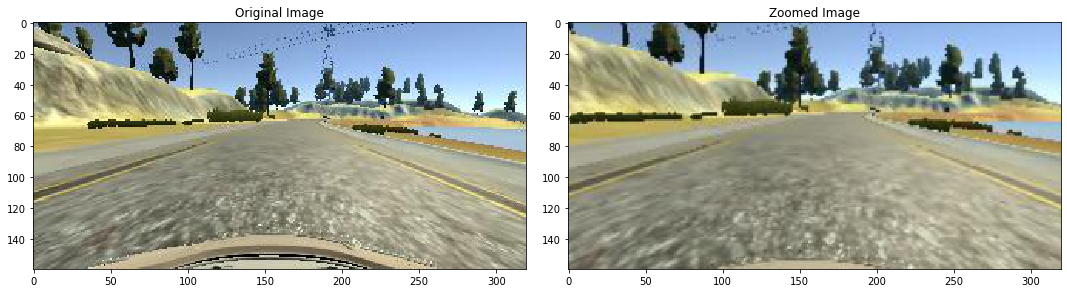

In [24]:
image = image_paths[random.randint(1846/2,(1846/2)+50)] #len(image_paths) 1847
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axes = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title('Original Image')

axes[1].imshow(zoomed_image)
axes[1].set_title('Zoomed Image')

*problem is that I did not properly collect my data*

In [ ]:
def pan(image):
   pan = iaa.Affine(translate_percent={"x":(-0.1, 0.1), "y":(-0.1,0.1)})
   image = pan.augment_image(image)
   return image

Text(0.5, 1, 'Panned Image')

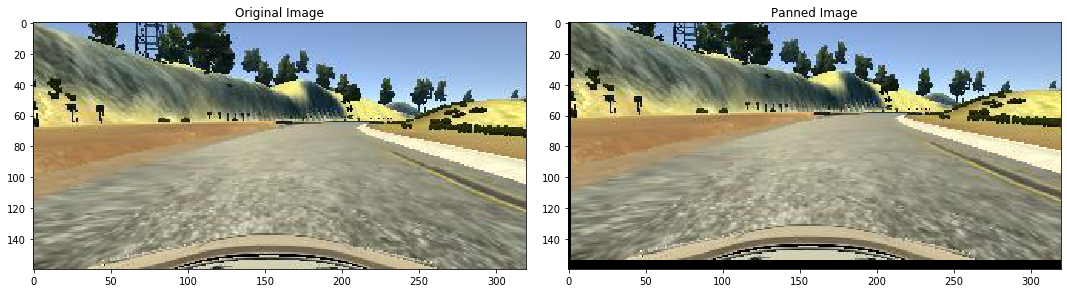

In [26]:
image = image_paths[random.randint(1846/2,(1846/2)+50)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axes = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title('Original Image')

axes[1].imshow(panned_image)
axes[1].set_title('Panned Image')

In [ ]:
def img_random_brightness(image):
  brightness = iaa.Multiply((0.2, 1.2))
  image = brightness.augment_image(image)
  return image

Text(0.5, 1, 'Brightness Altered Image')

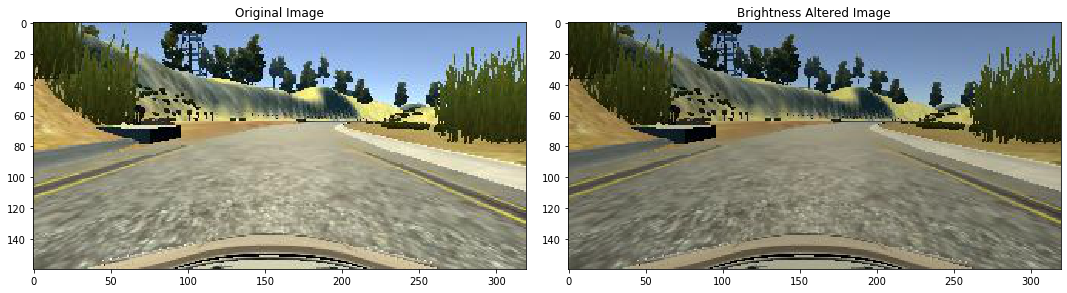

In [28]:
image = image_paths[random.randint(1846/2,(1846/2)+50)]

original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, axes = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title('Original Image')

axes[1].imshow(brightness_altered_image)
axes[1].set_title('Brightness Altered Image')

In [ ]:
def img_random_flip(image,steering_angle):
  image = cv2.flip(image, 1)
  steering_angle = -steering_angle
  return image, steering_angle

Text(0.5, 1, 'Flipped Image Steering Angle:-0.0')

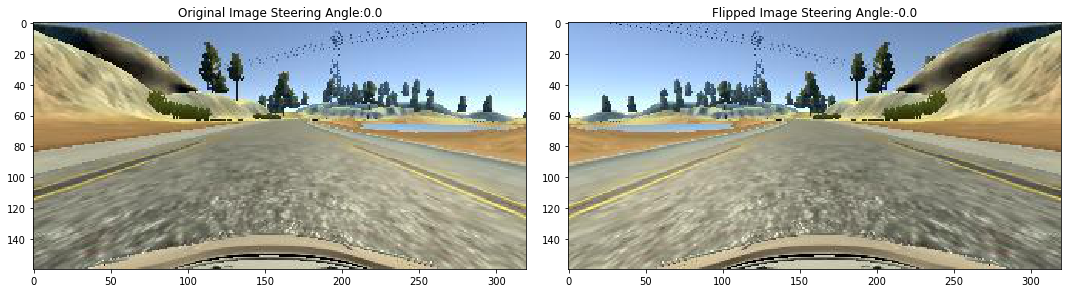

In [30]:
random_index = random.randint(1846/2,(1846/2)+50)
image = image_paths[random_index]
steering_angle = steerings[random_index]

original_image = mpimg.imread(image)
flipped_image, flipped_steering = img_random_flip(original_image, steering_angle)

fig, axes = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title('Original Image' + ' Steering Angle:' + str(steering_angle))

axes[1].imshow(flipped_image)
axes[1].set_title('Flipped Image' + ' Steering Angle:' + str(flipped_steering))

In [31]:
#TEST
np.random.rand()

0.9441778099243703

In [ ]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)
    
    return image, steering_angle

In [33]:
fig , axes = plt.subplots(nrows=10,ncols=2, figsize=(15,50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0,len(image_paths)-1)
  random_image = image_paths[randnum]
  random_steering =steerings[randnum]

  original_image = mpimg.imread(random_image)
  augmented_image , steering = random_augment(random_image, random_steering)

  axes[i][0].imshow(original_image)
  axes[i][0].set_title('Original Image')

  axes[i][1].imshow(augmented_image)
  axes[i][1].set_title('Augmented Image')

Output hidden; open in https://colab.research.google.com to view.

In [35]:
image_paths[0]

'track/IMG/center_2018_07_16_17_11_43_860.jpg'

In [ ]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

Text(0.5, 1, 'Preprocesses Image')

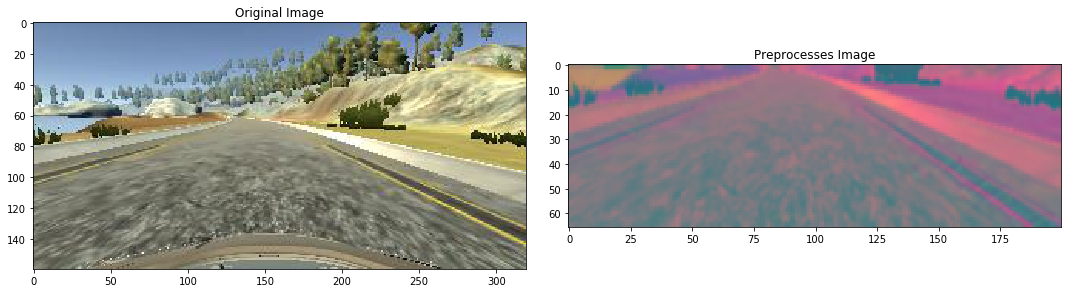

In [37]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title('Original Image')

axes[1].imshow(preprocessed_image)
axes[1].set_title('Preprocesses Image')

In [ ]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  while True:
    batch_img = []
    batch_steering = []
    for i in range(batch_size):
      random_index = random.randint(0,len(image_paths)-1)

      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1, 'x_valid_gen')

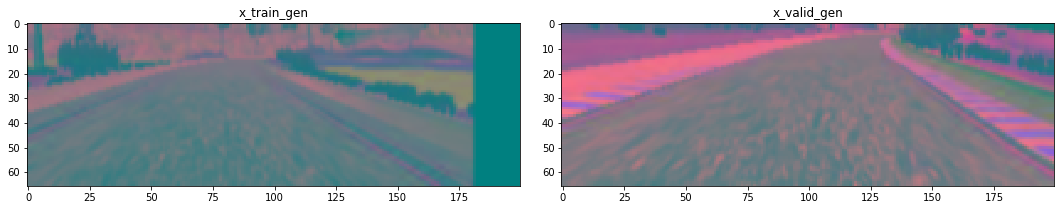

In [39]:
x_train_gen, y_train_gen = next(batch_generator(X_train,y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid,y_valid, 1, 0))

fig, axes = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axes[0].imshow(x_train_gen[0])
axes[0].set_title('x_train_gen')

axes[1].imshow(x_valid_gen[0])
axes[1].set_title('x_valid_gen')


In [ ]:
#X_train = np.array(list(map(img_preprocess, X_train)))
#X_valid = np.array(list(map(img_preprocess, X_valid)))
#plt.imshow(X_train[random.randint(0,len(X_train)-1)])
#plt.axis('off')
#print(X_train.shape)

In [ ]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, 5, 5, subsample=(2,2), input_shape=(66,200,3) , activation='elu' ))
  model.add(Convolution2D(36, 5 ,5, subsample=(2,2), activation='elu'))
  model.add(Convolution2D(48, 5 ,5, subsample=(2,2), activation='elu'))
  model.add(Convolution2D(64, 3 ,3, activation='elu'))
  model.add(Convolution2D(64, 3 ,3, activation='elu'))
  #model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(100, activation='elu'))
  #model.add(Dropout(0.5))

  model.add(Dense(50, activation='elu'))
  #model.add(Dropout(0.5))

  model.add(Dense(10, activation='elu'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(1))

  optimizer = Adam(lr = 1e-4)
  model.compile(loss='mse', optimizer=optimizer)
  
  return model

In [41]:
model = nvidia_model()
print(model.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)             

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  import sys


In [42]:
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1 ),
                              steps_per_epoch=300,
                              epochs=10,
                              validation_data=batch_generator(X_valid, y_valid, 100, 0),
                              validation_steps=200,
                              verbose=1,
                              shuffle=1)




Epoch 1/10





300/300 [==============================] - 190s 633ms/step - loss: 0.0893 - val_loss: 0.0436
Epoch 2/10
300/300 [==============================] - 173s 578ms/step - loss: 0.0714 - val_loss: 0.0406
Epoch 3/10
300/300 [==============================] - 170s 568ms/step - loss: 0.0617 - val_loss: 0.0355
Epoch 4/10
300/300 [==============================] - 169s 564ms/step - loss: 0.0560 - val_loss: 0.0294
Epoch 5/10
300/300 [==============================] - 168s 560ms/step - loss: 0.0520 - val_loss: 0.0415
Epoch 6/10
300/300 [==============================] - 168s 561ms/step - loss: 0.0507 - val_loss: 0.0300
Epoch 7/10
300/300 [==============================] - 167s 558ms/step - loss: 0.0454 - val_loss: 0.0302
Epoch 8/10
300/300 [==============================] - 167s 557ms/step - loss: 0.0445 - val_loss: 0.0301
Epoch 9/10
300/300 [==============================] - 166s 554ms/step - loss: 0.0427 - val_loss: 0.0278
Epoch 10/10
300/300 [==============================] - 1

Text(0.5, 0, 'epoch')

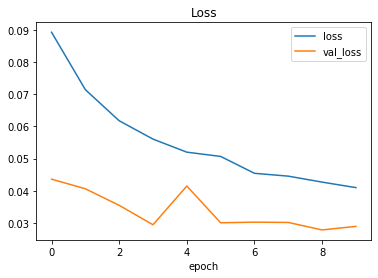

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [ ]:
model.save('road_model_gpu_amer.h5')

In [ ]:
#!ls

In [45]:
from google.colab import files
files.download('road_model_gpu_amer.h5')

MessageError: ignored

In [ ]:
print('DONE!')